# Interactive Marsquake Location

Since humanity currently only operates a single seismometer on Mars, we cannot use traditional methods, such as triangulation between several stations to locate a quake. Instead, we need to separate the problem into two parts:
1. Determine the Distance
2. Determine the Direction (Backazimuth)

## Lesson 1: Distance

To determine the distance, we pick a P-wave and an S-wave arrival and then try to find the distance that matches the differential travel time between the two. Typically, P-waves travel about 1.7 times faster, or $v_P=\sqrt{3}V_S$ in a Poisson medium. Using mineral physics, researchers came up with reasonable predictions for the seismic velocity profile of Mars, even before we had any seismic data.
For our case, we use a velocity model called *InSight_KKS21GP*, that was based on the first full mantle-dataset presented in *Stähler et al. (2021)*.

### What to do:
In the left column, you see 3 seismograms, first the vertical component, then the one pointing in North/South direction, then the East/West one. The seismograms are real data from Mars, for the **S0235b** marsquake, that happened on 2019-07-26T12:15:38 or the 235th Martian day after landing (hence the name). 

This quake has relatively clear P- and S-wave arrivals. You can pick them using the two sliders above the figure. 
The sliders are a bit tricky to use. Use the left and right arrow keys to increase/decrease by one second, page up/down to go in 5 second steps.

After picking two times, you'll see that the plot in the right column, a *traveltime distance plot* obtains a marker at the combination of $t_P$, $t_S$ that you picked, as well as the corresponding distance. Note that there are values of $t_S - t_P$, for which no distance can be found, e.g. for $t_S<t_P$ or differences above 500 seconds. Both of these values are unphysical and most likely mean that you picked the wrong phase.

The dropdown box below allows you to pick another event. Pick **S0173a** next. You'll notice that the identification of *P* and *S* is far more difficult here. Specifically, there are a handful of long-period, high amplitude signals in the way. We call them *glitches* and they are likely a tiny cracking in the seismometer casing due to temperature changes. Select *Plot spectrograms* to see a spectrogram instead of a waveform. This can make it much easier to detect a phase arrival in presence of noise.

If you want to pick any of the other quakes, the spectrogram is usually much more helpful than the seismogram.

In the lowest row you see a map of Mars, with a circle that corresponds to the distance that you just picked. Can you spot a tectonic feature that might correspond to your location?

['S0235b', 'S0173a', 'S0183a', 'S0185a', 'S0809a', 'S1048d', 'S1133c', 'S1094b']


Locate1(children=(VBox(children=(HBox(children=(IntSlider(value=150, description='P-arrival', max=1200), IntSl…

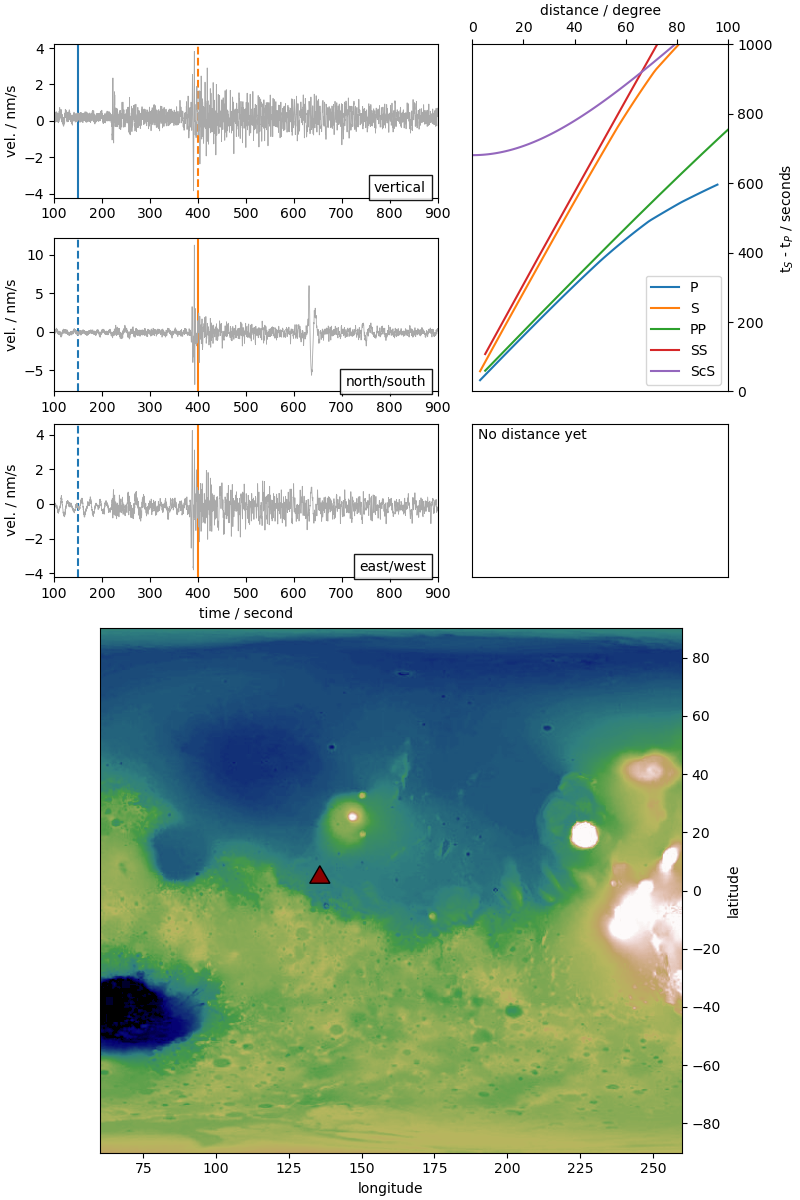

In [1]:
# Execute this cell!
%matplotlib widget

from helpers.locate_1 import Locate1

Locate1()

## Lesson 2: Direction / Backazimuth

To determine the direction towards the marsquake, we rely on the polarization of the P-wave. The P-wave is a compressional wave and its direction of propagation is thus the same as the direction of motion. In the plot below, you see the three seismograms again (vertical, North/South, East/West). In the right column, a so-called *hodogram* is plot: It shows an XY-plot of the motion in both horizontal directions of a 15 second time window around the P-arrival time that you picked. 
- Select an event and the corresponding arrival time from exercise 1. In the small figures at the bottom of the right column, you see a zoom on the P-window, which you can use to fine-tune your pick.
- Now the hodogram should show low-amplitude motion around 0, followed by a large amplitude signal that is more or less linear. Use this direction as an estimate of the backazimuth.
- Use the backazimuth slider to select a backazimuth. It is shown in the hodogram now, so you can estimate the quality of your pick.
- Check the map below to see where you placed the event.

Locate2(children=(VBox(children=(HBox(children=(IntSlider(value=150, description='P-arrival', max=1200), IntSl…

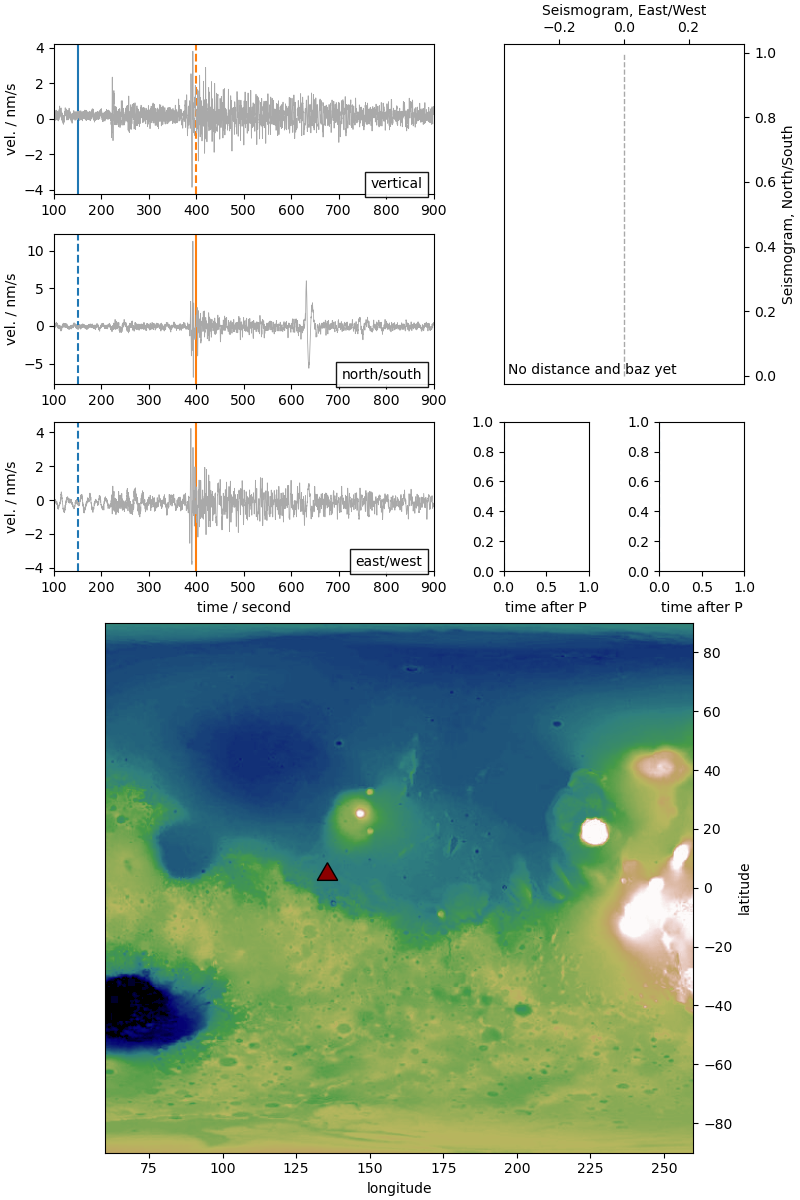

In [2]:
%matplotlib widget

from helpers.locate_2 import Locate2

Locate2()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client("ETH")

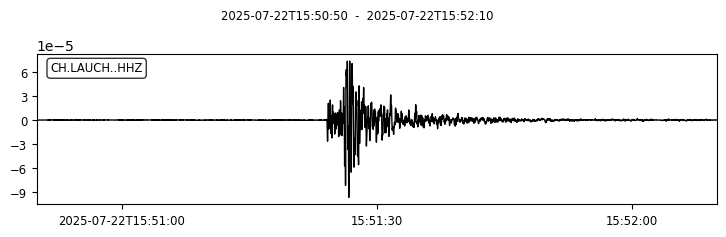

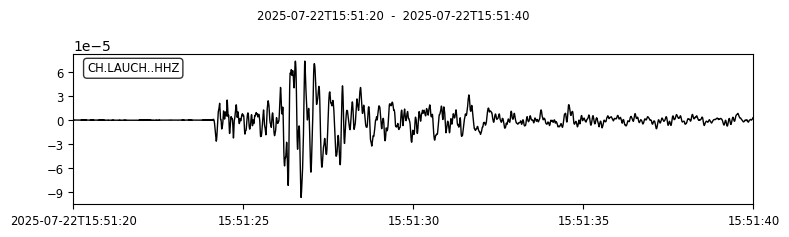

In [6]:
# Wir können Erdbebendaten von beliebigen Stationen und Seismometern herunterladen.
# Dafür benutzten wir das obspy Paket.
import matplotlib.pyplot as plt
import numpy as np
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

# Wir können auf dem ETH Server nach Daten suchen:
client = Client("ETH")

# Wir können einen Zeitpunkt eingeben von dem wir Daten laden wollen, z.B. nach einem Erdbeben in der Schweiz (Muerren BE, Magnitude 3.3)
# Mehr Information sind hier: http://seismo.ethz.ch/en/earthquakes/switzerland/eventpage.html?originId=%27c21pOmNoLmV0aHouc2VkL3NjMjBhZy9PcmlnaW4vTkxMLjIwMjUwODEyMTAzNTE5LjUxMDg5Mi4xMjAxMjU=%27&date_ch=2025-07-22&time_ch=17:51&region=Muerren%20BE&magnitude=3.3

start_time = UTCDateTime("2025-07-22T15:51:20")

# Und dann laden wir Daten von einem bestimmten Seismometer zu diesem Zeitpunkt herunter.
# Um den Seismometer zu identifizieren hat jeder Sensor einen Code aus
# Netzwerk (network) z.B. "CH" das Schweiz. Netwerk
# Station (station) z.B. "LAUCH"
# Kanal (channel) z.B. "HHZ" was der Aufzeichnung entlang der vertikalen Richtung/Komponente eines Breitbandseismometers entspricht
# Siehe auch http://www.seismo.ethz.ch/de/monitoring/national-seismic-network/

# Die Daten werden in einem Stream gespeichert,
# welcher ein oder mehrere Seismogramme, sowie Metadaten wie Informationen über den Seismometer und Zeiten, enthält
stream = client.get_waveforms(
    network="CH",
    station="LAUCH",
    location="*",
    channel="HH*",   #
    starttime=start_time-30,
    endtime=start_time+50,
    attach_response=True
)

# Wir können die Aufzeichnungen plotten und sehen die Bodenbewegung die vom Seismometer aufgezeichnet wurde
# entlang der vertikale (HHZ), Ost-West (HHE), und Nord-Süd (HHN) Komponente
stream.plot();

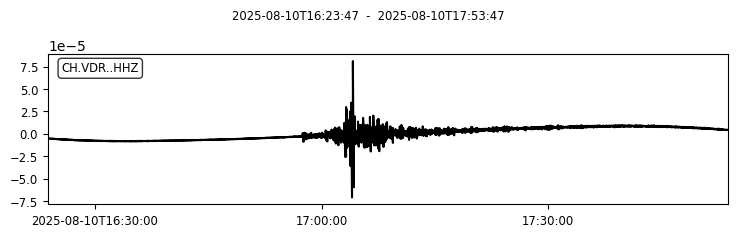

In [45]:
# Desweiteren bereiten wir die Daten vor, dieser Schritt wandelt die Aufzeichnungen des Seismometers in physikalische Einheiten um
# hier in Meter pro Sekunde (Velocity)
stream.remove_response(output="VEL")

# Letzendlich können wir das ausgewählte Seismogram plotten
stream.plot();


In [46]:
# Und das Seismogram noch kürzen
stream.trim(start_time, start_time+20);

# Und es erneut plotten
stream.plot();

# Frage: Welche Wellentypen können erkannt werden, und auf welcher Komponente?

Period  182 s → Band 0.0039–0.0078 Hz (≈ 128.7–257.4 s)


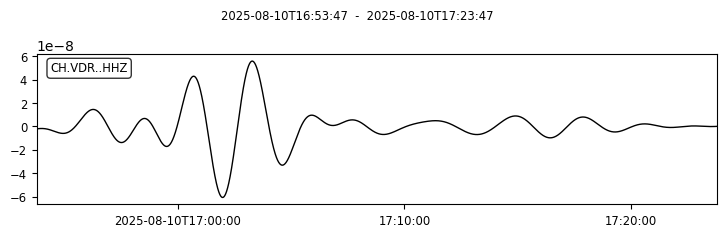

Period  128 s → Band 0.0055–0.0110 Hz (≈ 90.5–181.0 s)


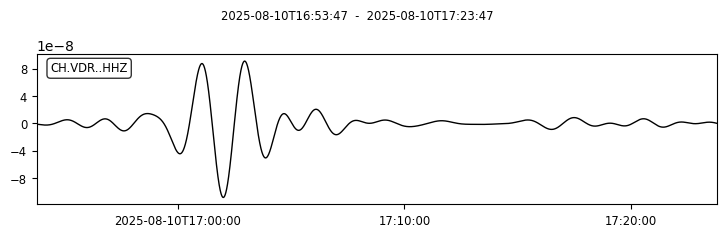

Period   90 s → Band 0.0079–0.0157 Hz (≈ 63.6–127.3 s)


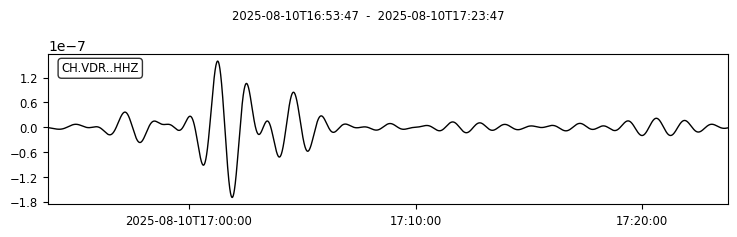

Period   64 s → Band 0.0110–0.0221 Hz (≈ 45.3–90.5 s)


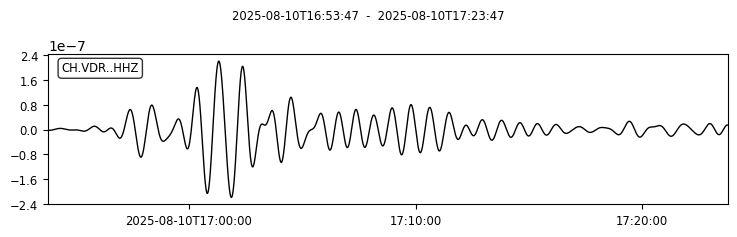

Period   45 s → Band 0.0157–0.0314 Hz (≈ 31.8–63.6 s)


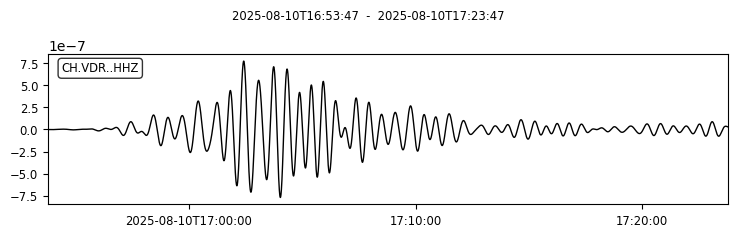

Period   32 s → Band 0.0221–0.0442 Hz (≈ 22.6–45.3 s)


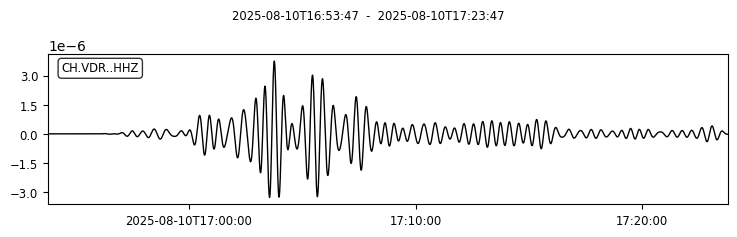

Period   22 s → Band 0.0321–0.0643 Hz (≈ 15.6–31.1 s)


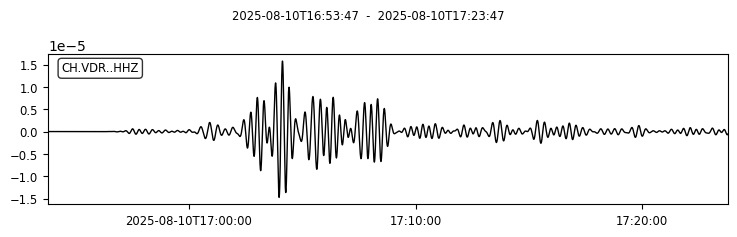

Period   16 s → Band 0.0442–0.0884 Hz (≈ 11.3–22.6 s)


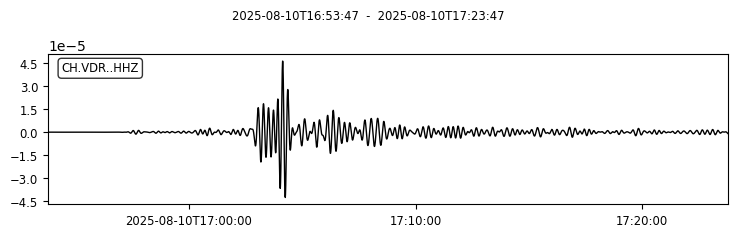

Period   11 s → Band 0.0643–0.1286 Hz (≈ 7.8–15.6 s)


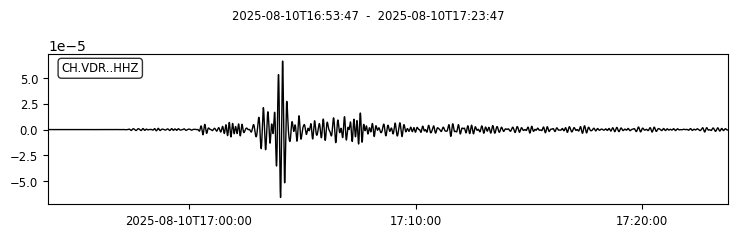

Period    8 s → Band 0.0884–0.1768 Hz (≈ 5.7–11.3 s)


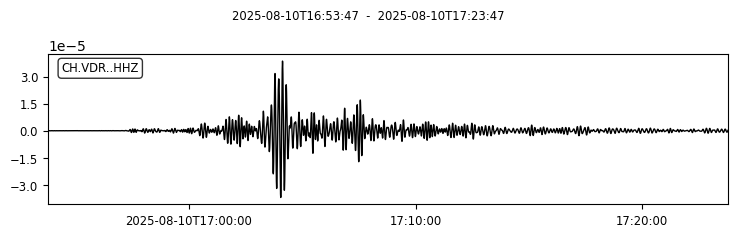

Period    4 s → Band 0.1768–0.3536 Hz (≈ 2.8–5.7 s)


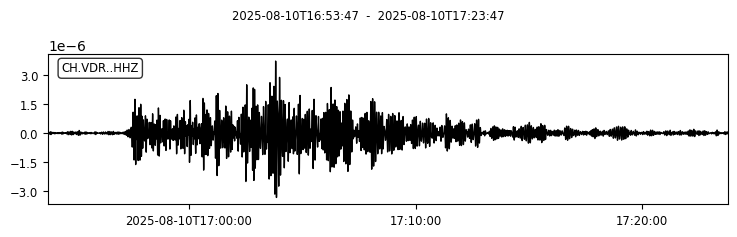

Period    2 s → Band 0.3536–0.7071 Hz (≈ 1.4–2.8 s)


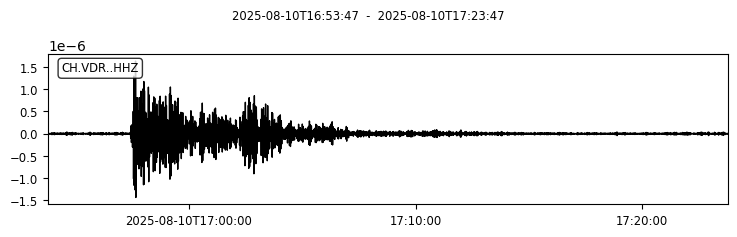

Period    1 s → Band 0.7071–1.4142 Hz (≈ 0.7–1.4 s)


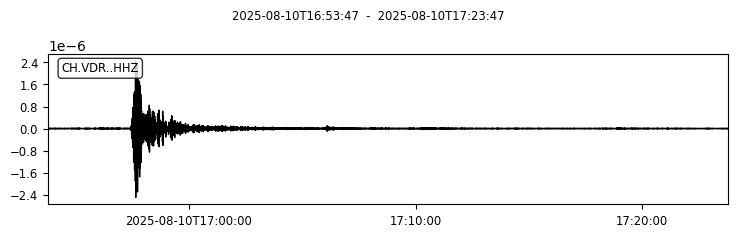

Period  0.5 s → Band 1.4142–2.8284 Hz (≈ 0.4–0.7 s)


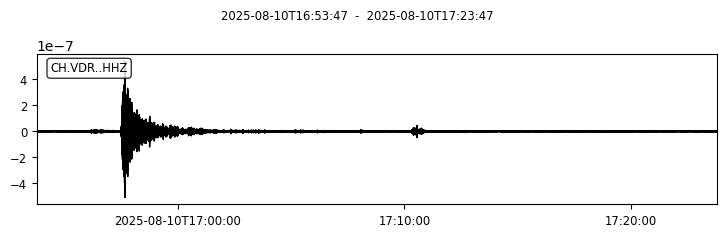

Period 0.25 s → Band 2.8284–5.6569 Hz (≈ 0.2–0.4 s)


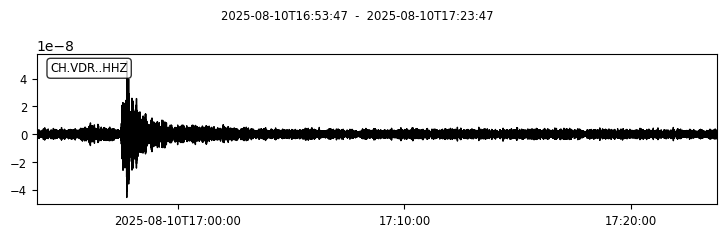

Period 0.125 s → Band 5.6569–11.3137 Hz (≈ 0.1–0.2 s)


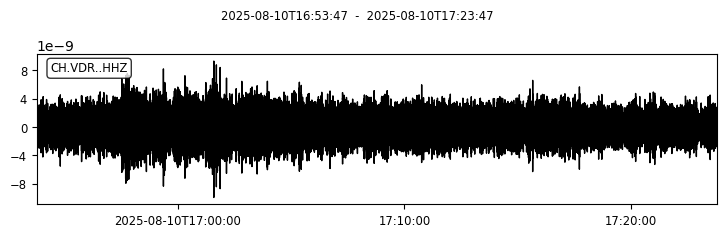

In [49]:
# Wir können einen Zeitpunkt eingeben von dem wir Daten laden wollen, z.B. die Zeit nach dem Mw 8.8 Kamchatka Erdbeben im July 2025
start_time = UTCDateTime("2025-07-29T23:24:51")

# Und dann laden wir Daten von einem bestimmten Seismometer zu diesem Zeitpunkt herunter.
# Um den Seismometer zu identifizieren hat jeder Sensor einen Code aus
# Netzwerk (network) z.B. "CH" das Schweiz. Netwerk
# Station (station) z.B. "LAUCH"
# Kanal (channel) z.B. "HHZ" was der Aufzeichnung entlang der vertikalen Richtung/Komponente eines Breitbandseismometers entspricht
# Siehe auch https://networks.seismo.ethz.ch/en/networks/ch/

# Die Daten werden in einem Stream gespeichert,
# welcher ein oder mehrere Seismogramme, sowie Metadaten wie Informationen über den Seismometer und Zeiten, enthält

stream = client.get_waveforms(
    network="CH",
    station="VDR",
    location="*",
    channel="HHZ",   # Z: vertical components N: North components  E: East components
    starttime=start_time,
    endtime=start_time+2*3600,
    attach_response=True
).merge()

# Desweiteren bereiten wir die Daten vor, dieser Schritt wandelt die Aufzeichnungen des Seismometers in physikalische Einheiten um
# hier in Meter pro Sekunde (Velocity)
stream.remove_response(output="VEL")

# Letzendlich können wir das ausgewählte Seismogram plotten
stream.plot();


In [28]:
# Wir filtern das Seismogramme in verschiedenen Frequenzbändern (oder Perioden in Sekunden)
periods = [182, 128, 90, 64, 45, 32, 22, 16, 11, 8, 4, 2, 1, 0.5, 0.25][::-1]

stream_filt = stream.copy()

n = len(periods)+1

fig, axes = plt.subplots(n, 1, figsize=(10, n*3))
axes = axes.flatten()


# --- unfiltered trace ---
st_unf = stream_filt.copy()
st_unf.trim(start_time, start_time + 3*3600)
tr = st_unf[0]
t = np.arange(tr.stats.npts) / tr.stats.sampling_rate
axes[0].plot(t, tr.data, lw=0.7)
axes[0].set_title("Unfiltered", fontsize=14)

for i, T in enumerate(periods,start=1):
    f_c = 1.0 / T
    fmin = f_c / np.sqrt(2)
    fmax = f_c * np.sqrt(2)

    st_band = stream_filt.copy()
    st_band.filter("bandpass", freqmin=fmin, freqmax=fmax,
                   corners=4, zerophase=True)
    st_band.trim(start_time, start_time + 3*3600)

    tr = st_band[0]  # assuming one trace in stream
    t = np.arange(tr.stats.npts) / tr.stats.sampling_rate
    axes[i].plot(t, tr.data, lw=0.7)
    axes[i].set_title(f"Filtered data: T={T}s  ({fmin:.3f}-{fmax:.3f} Hz)", fontsize=14)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

for ax in axes:

    ax.set_xlim(t[0],t[-1])
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Amplitude [m/s]")

plt.tight_layout()
plt.show()

5 Event(s) in Catalog:
2025-07-30T01:42:35.022964Z | +47.299,   +8.438 | 2.97 MLhc | manual
2025-07-29T09:42:56.710049Z | +47.619,   +7.825 | 2.62 MLhc | manual
2025-07-28T13:48:21.323146Z | +47.618,   +7.824 | 3.08 MLhc | manual
2025-07-22T15:51:21.146842Z | +46.541,   +7.848 | 3.29 MLhc | manual
2025-07-21T10:52:16.706137Z | +46.540,   +7.859 | 4.18 MLhc | manual


ImportError: Cartopy could not be imported.

Using event at 2025-07-30T01:42:35.022964Z M2.967159696 Lat 47.29902679, Lon 8.437549525
Inventory created at 2025-08-19T13:51:53.464026Z
	Sending institution: SeisComP (SED)
	Contains:
		Networks (1):
			CH
		Stations (123):
			CH.ACB (Klingnau, Acheberg, AG)
			CH.BALST (Balsthal, SO)
			CH.BERGE (Lenzkirch, Germany)
			CH.BLOTZ (Kappelen, Rue du Rhin, France)
			CH.BNALP (Bannalp, NW)
			CH.BOBI (Boebikon, Wasserreservoir Allmend, AG)
			CH.BOURR (Bourrignon, JU)
			CH.BULAC (Bülach, ZH)
			CH.DAGMA (Dagmersellen, Lutertal, LU)
			CH.EMING (Emmingen, Germany)
			CH.EMMET (Emmethof, AG)
			CH.EWZT0 (Zuerich, Triemli, ZH)
			CH.EWZT2 (Wettswil, ZH)
			CH.FIESA (Fiescheralp, VS)
			CH.FLACH (Felsenburg, Rüdlingen, SH)
			CH.FUSIO (Fusio, TI)
			CH.GRIMS (Grimsel, Gerstenegg, BE)
			CH.HAMIK (Haemikon, Daelikerfeld, LU)
			CH.HASLI (Hasliberg, BE)
			CH.HAUIG (Lörrach, Café Hygge Rechberg, Deutschland)
			CH.LIENZ (Kamor, SG)
			CH.LLS (Linth-Limmern, GL)
			CH.MATTE (Basel, Schuetzenma

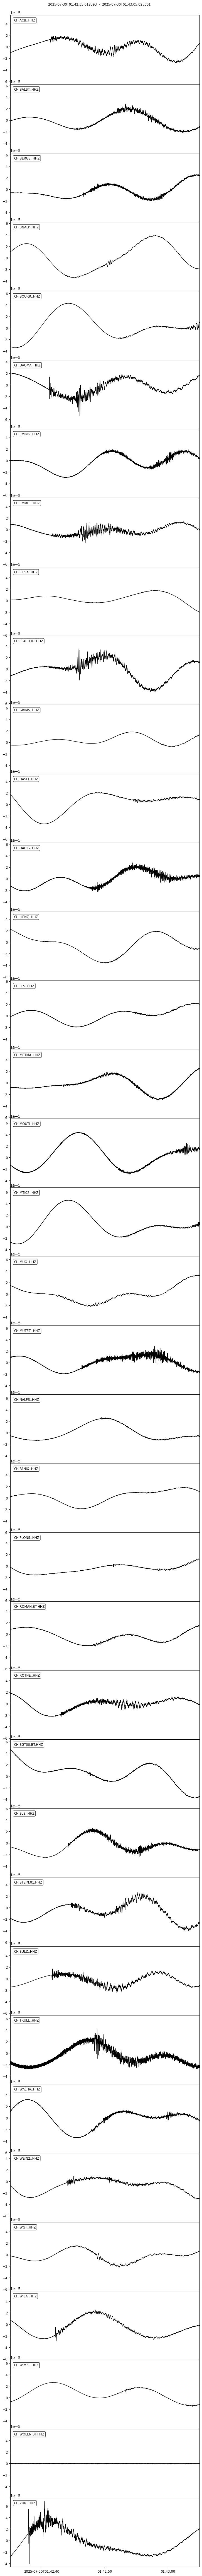

In [14]:
def preprocess(time, seconds, network, station, channel):
    stream = Client("ETH").get_waveforms(
    network=network,
    station=station,
    location="*",
    channel=channel,   #
    starttime=time-30,
    endtime=time++seconds+30,
    attach_response=True
    )
    stream.remove_response(output="DISP")
    stream.filter("bandpass",freqmin=1,freqmax=30)
    return stream.trim(time, time+seconds).merge()


time = UTCDateTime("2025-07-22T15:51:21")
seconds = 60


trace_LAUCH = preprocess(time, seconds, "CH", "LAUCH", "HHZ")[0]
trace_SFRS = preprocess(time, seconds, "CH", "SFRS", "HGZ")[0]
trace_WIMIS = preprocess(time, seconds, "CH", "WIMIS", "HHZ")[0]
trace_FIESA = preprocess(time, seconds, "CH", "FIESA", "HHZ")[0]
trace_HASLI = preprocess(time, seconds, "CH", "HASLI", "HHZ")[0]
trace_GRIMS = preprocess(time, seconds, "CH", "GRIMS", "HHZ")[0]
trace_STSW2 = preprocess(time, seconds, "CH", "STSW2", "HGZ")[0]
trace_VANNI = preprocess(time, seconds, "CH", "VANNI", "HHZ")[0]
trace_JAUN = preprocess(time, seconds, "CH", "JAUN", "HHZ")[0]
trace_MMK = preprocess(time, seconds, "CH", "MMK", "HHZ")[0]
trace_DIX = preprocess(time, seconds, "CH", "DIX", "HHZ")[0]
trace_GRYON = preprocess(time, seconds, "CH", "GRYON", "HHZ")[0]
trace_DAGMA = preprocess(time, seconds, "CH", "DAGMA", "HHZ")[0]
trace_MOUTI = preprocess(time, seconds, "CH", "MOUTI", "HHZ")[0]
trace_PANIX = preprocess(time, seconds, "CH", "PANIX", "HHZ")[0]
trace_WILA = preprocess(time, seconds, "CH", "WILA", "HHZ")[0]
trace_SLE = preprocess(time, seconds, "CH", "SLE", "HHZ")[0]
trace_EMING = preprocess(time, seconds, "CH", "EMING", "HHZ")[0]

distances = {"LAUCH":15.1,
             "SFRS":15.4,
             "WIMIS":22.0,
             "FIESA":23.2,
             "HASLI":33.3,
             "GRIMS":36.2,
             "STSW2":38.5,
             "VANNI":41.5,
             "JAUN":43.8,
             "MMK":55.2,
             "DIX":61.2,
             "GRYON":65.1,
             "DAGMA":77.7,
             "MOUTI":92.6,
             "PANIX":101.4,
             "WILA":126.1,
             "SLE":144.5,
             "EMING":168.3,

            }

traces = [
    trace_LAUCH, trace_SFRS, trace_WIMIS, trace_FIESA, trace_HASLI,
    trace_GRIMS, trace_STSW2, trace_VANNI, trace_JAUN,
    trace_MMK, trace_DIX, trace_GRYON, trace_DAGMA,
    trace_MOUTI, trace_PANIX , trace_WILA, trace_SLE, trace_EMING
]


peak_amplitude_list = []
distance_list = []
for trace in traces:

    plt.figure(figsize=(9,3))
    plt.plot(trace.times(),trace.data,color="k")
    distance = distances[trace.stats.station]
    plt.title(trace.id + " Distanz [km]: " + str(distance))
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude [m/s]")

    plt.show()

    peak_amplitude_list.append(np.max(np.abs(trace.data)))
    distance_list.append(distance)


    plt.scatter(distance_list,peak_amplitude_list,label="Messungen maximale Amplitude")
plt.yscale("log")
plt.ylabel("Maximale Bodenbewegung [m/s]")

plt.xlabel("Distanz [km]")

r = np.linspace(10, 200, 1000)   # km
A = 1.0 / r**2                     # 1/distance
# linear plot
plt.plot(r, 0.03*A, lw=2, label='Amplitude ∝ 1/r^2')
plt.legend()

plt.show()


# Magnituden
magnituden_list = []
for dist, ampl in zip(distance_list,peak_amplitude_list):
    ampl_micrometer = ampl * 1e6

    # Richter Magnitudenskala (empirisch)
    magnituden_list.append(np.log10(ampl_micrometer) -2.48 + 2.76 * np.log10(dist))

plt.scatter(distance_list, magnituden_list,color="k",label="Stationen-Magnitude")
plt.legend()
plt.title(f"Median Magnitude: {np.median(magnituden_list):.1f}  // Magnitude SED: Mlhc 3.3")


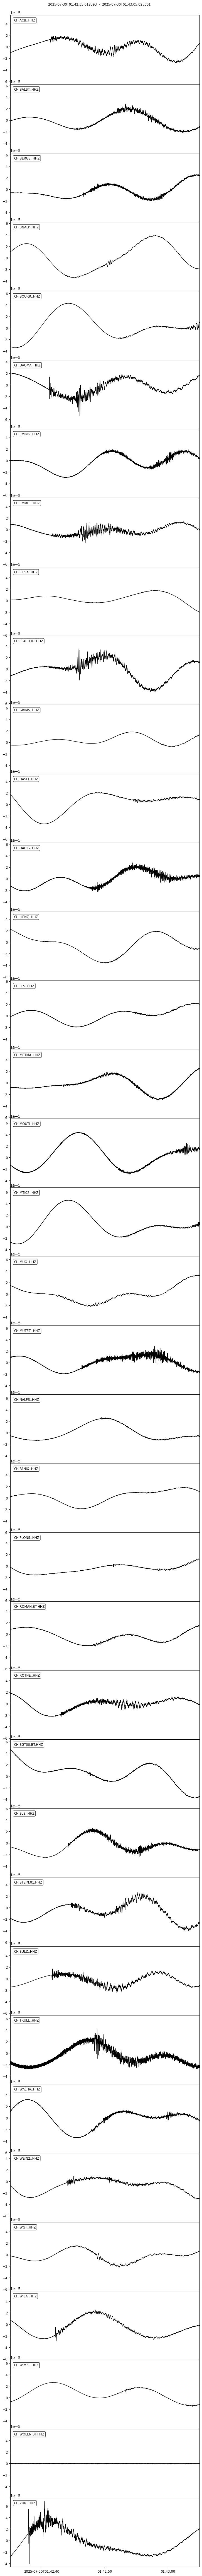

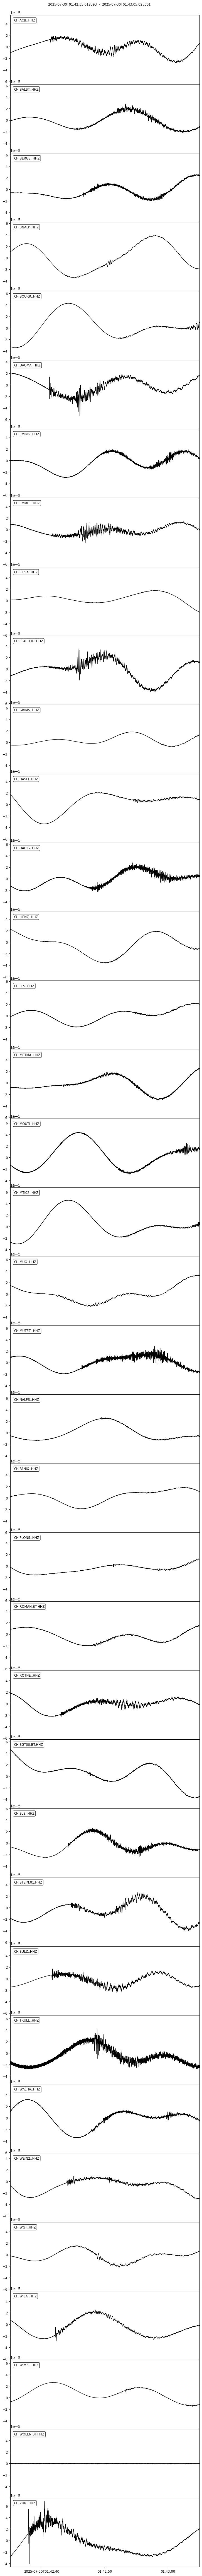

In [16]:
st.plot()